In [1035]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [1036]:
os.chdir('/Users/jennlauralee/GitHub Repos/Space-Number/DATA')
alldata = pd.read_pickle('alldata.pkl')
alldata.reset_index(drop=True, inplace=True)


0        30.990506
1        57.119697
2        75.678441
3        60.135069
4        74.872886
           ...    
11995    49.461973
11996    52.626163
11997    37.125211
11998    65.543524
11999    64.013813
Name: x_mean, Length: 12000, dtype: float64

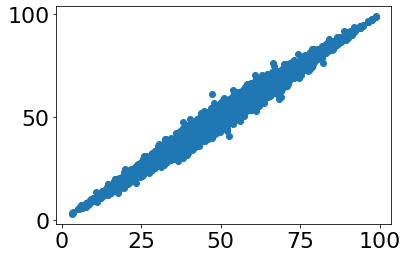

In [1037]:
os.chdir('/Users/jennlauralee/GitHub Repos/Space-Number/MODELLING/Iterative distance model')
modelpred = pd.read_csv('modelpred_lognormalsingle.csv')

alldata['mu_pred']= modelpred['mu_pred']
alldata['conf_pred']= modelpred['conf_pred']
alldata['iter_pred']= modelpred['iter_pred']

plt.scatter(alldata.x_mean, alldata.mu_pred)

alldata.x_mean

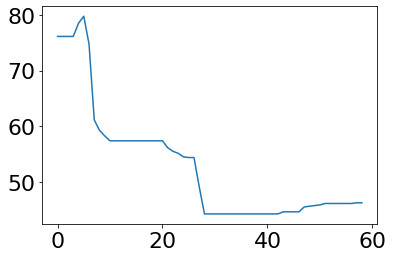

In [1038]:
#Calculate mousetracking length
#mousetrack_rel = alldata.Mouse_track - alldata.Resp_loc

plt.figure(5) 
plt.plot(alldata.Mouse_track[ntrial][0])

L = [pathlength(mousetrack_rel[i][0],np.arange(0,len(alldata.Mouse_track[i][0]))) for i in range(0,len(alldata.Mouse_track))]
L = pd.DataFrame(L)
alldata['mouse_length']= L


In [1039]:
logx = [np.log(alldata.x_mean[i]) for i in range(0,len(alldata.x_mean))]
logx = pd.DataFrame(logx)
alldata['logx']= logx

In [1040]:
#Calculate certain features

resperror=[]
for ii in alldata.index.values:
    resperror.append(np.abs(alldata.x_mean[ii] - alldata.Resp_loc[ii]))

stimstd=[]
for ii in alldata.index.values:
    stimstd.append(np.std(alldata.X[ii]))
    
stimrange=[]
for ii in alldata.index.values:
    stimrange.append(np.abs(np.max(alldata.X[ii])- np.min(alldata.X[ii])))    
    
alldata['resperror'] = resperror
alldata['stimstd'] = stimstd
alldata['stimrange'] = stimrange



numdata = alldata[alldata["Num_block"]==1]
spacedata = alldata[alldata["Num_block"]==0]



In [1041]:
# stim_mu_bins = pd.qcut(alldata['x_mean'],q=5, labels=range(1,6))
# stim_std_bins = pd.qcut(alldata['stimstd'],q=5, labels=range(1,6))
# stim_range_bins = pd.qcut(alldata['stimrange'],q=5, labels=range(1,6))
# error_bins = pd.qcut(alldata['resperror'],q=5, labels=range(1,6))

# alldata['stim_bins'] = stim_mu_bins
# alldata['stim_std_bins'] = stim_std_bins
# alldata['stim_range_bins'] = stim_range_bins
# alldata['error_bins'] = error_bins

alldata['stim_bins'] = pd.qcut(alldata['x_mean'],q=5, labels=range(1,6))
alldata['stim_std_bins'] = pd.qcut(alldata['stimstd'],q=5, labels=range(1,6))
alldata['stim_range_bins'] = pd.qcut(alldata['stimrange'],q=5, labels=range(1,6))
alldata['error_bins'] = pd.qcut(alldata['resperror'],q=5, labels=range(1,6))
alldata['mouse_length_bins'] = pd.qcut(alldata['mouse_length'],q=5, labels=range(1,6))
alldata['iter_pred_bins'] = pd.qcut(alldata['iter_pred'],q=5, labels=range(1,6))

numdata['stim_bins'] = pd.qcut(numdata['x_mean'],q=5, labels=range(1,6))
numdata['stim_std_bins'] = pd.qcut(numdata['stimstd'],q=5, labels=range(1,6))
numdata['stim_range_bins'] = pd.qcut(numdata['stimrange'],q=5, labels=range(1,6))
numdata['error_bins'] = pd.qcut(numdata['resperror'],q=5, labels=range(1,6))
numdata['mouse_length_bins'] = pd.qcut(numdata['mouse_length'],q=5, labels=range(1,6))

spacedata['stim_bins'] = pd.qcut(spacedata['x_mean'],q=5, labels=range(1,6))
spacedata['stim_std_bins'] = pd.qcut(spacedata['stimstd'],q=5, labels=range(1,6))
spacedata['stim_range_bins'] = pd.qcut(spacedata['stimrange'],q=5, labels=range(1,6))
spacedata['error_bins'] = pd.qcut(spacedata['resperror'],q=5, labels=range(1,6))
spacedata['mouse_length_bins'] = pd.qcut(spacedata['mouse_length'],q=5, labels=range(1,6))


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

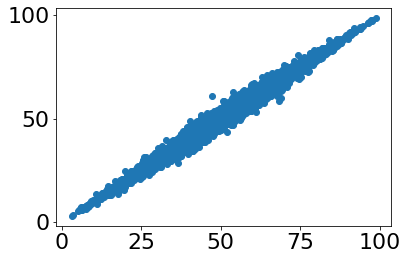

In [980]:
plt.scatter(numdata.x_mean, numdata.mu_pred)

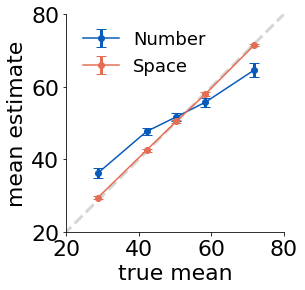

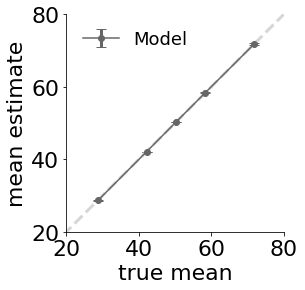

In [1018]:
plt.figure(0)
plt.errorbar(numdata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).Resp_loc.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).Resp_loc.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).Resp_loc.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).Resp_loc.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

plt.plot([0,100],[0,100],linewidth=3,linestyle='dashed',color='666666')
sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('true mean')
plt.ylabel('mean estimate')
plt.axis('square')
plt.legend(frameon=False,fontsize=18)
plt.xlim(20,80)
plt.ylim(20,80)

plt.show()


##### MODELPRED #####
plt.figure(0)
plt.errorbar(alldata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             alldata.groupby(['Sub_ID','stim_bins']).mu_pred.mean().groupby(['stim_bins']).mean(),
             alldata.groupby(['Sub_ID','stim_bins']).mu_pred.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#666666',ecolor='#666666', elinewidth=3, capsize=5, label='Model')

plt.plot([0,100],[0,100],linewidth=3,linestyle='dashed',color='666666')
sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('true mean')
plt.ylabel('mean estimate')
plt.axis('square')
plt.legend(frameon=False,fontsize=18)
plt.xlim(20,80)
plt.ylim(20,80)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))






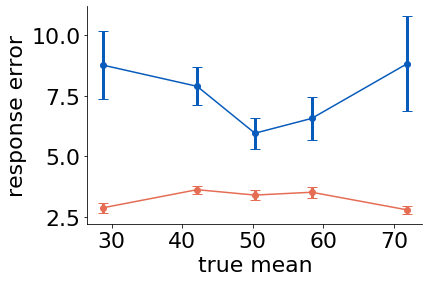

In [982]:
plt.figure(1)

plt.errorbar(numdata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).resperror.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).resperror.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).resperror.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).resperror.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('true mean')
plt.ylabel('response error')
#plt.axis('square')
#plt.legend(frameon=False,fontsize=18)
ax.set_aspect(1,'datalim')
#ax.set_aspect(aspect=0.5)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))


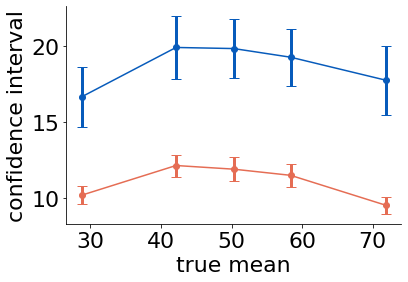

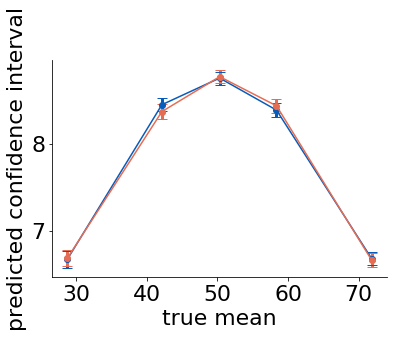

In [990]:
plt.figure(1)

plt.errorbar(numdata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).Resp_conf.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).Resp_conf.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).Resp_conf.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).Resp_conf.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('true mean')
plt.ylabel('confidence interval')
#plt.legend(frameon=False,fontsize=18)

plt.show()

plt.figure(1)

plt.errorbar(numdata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).conf_pred.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).conf_pred.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).conf_pred.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).conf_pred.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('true mean')
plt.ylabel('predicted confidence interval')
#plt.legend(frameon=False,fontsize=18)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))



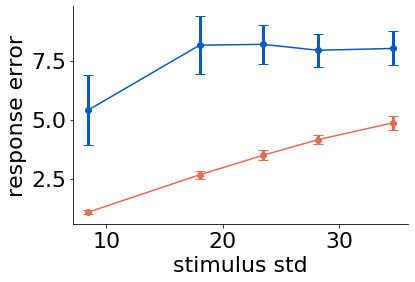

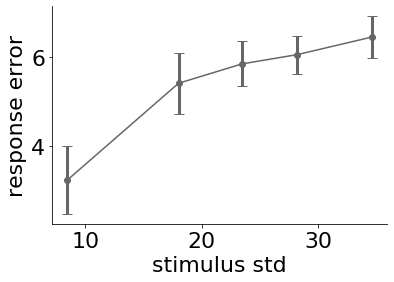

In [1021]:
plt.figure(2)

plt.errorbar(numdata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_std_bins']).resperror.mean().groupby(['stim_std_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_std_bins']).resperror.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_std_bins']).resperror.mean().groupby(['stim_std_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_std_bins']).resperror.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus std')
plt.ylabel('response error')
#plt.axis('square')
#plt.legend(frameon=False,fontsize=18)

plt.show()

plt.figure(2)

plt.errorbar(alldata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             alldata.groupby(['Sub_ID','stim_std_bins']).resperror.mean().groupby(['stim_std_bins']).mean(),
             alldata.groupby(['Sub_ID','stim_std_bins']).resperror.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#666666',ecolor='#666666', elinewidth=3, capsize=5, label='Model')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus std')
plt.ylabel('response error')
#plt.axis('square')
#plt.legend(frameon=False,fontsize=18)
plt.show()

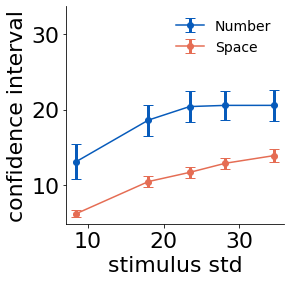

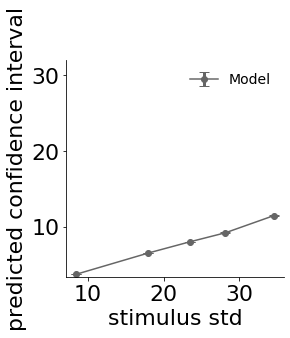

In [1015]:
plt.figure(2)

plt.errorbar(numdata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_std_bins']).Resp_conf.mean().groupby(['stim_std_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_std_bins']).Resp_conf.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_std_bins']).Resp_conf.mean().groupby(['stim_std_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_std_bins']).Resp_conf.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus std')
plt.ylabel('confidence interval')
plt.axis('square')
plt.legend(frameon=False,fontsize=14)

plt.show()


plt.figure(2)


plt.errorbar(alldata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             alldata.groupby(['Sub_ID','stim_std_bins']).conf_pred.mean().groupby(['stim_std_bins']).mean(),
             alldata.groupby(['Sub_ID','stim_std_bins']).conf_pred.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#666666',ecolor='#666666', elinewidth=3, capsize=5, label='Model')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus std')
plt.ylabel('predicted confidence interval')
plt.axis('square')
plt.legend(frameon=False,fontsize=14)

plt.show()


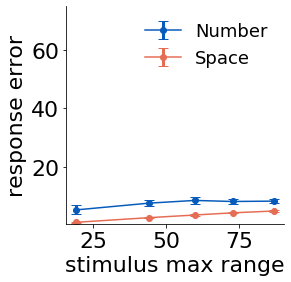

In [986]:
plt.figure(3)

plt.errorbar(numdata.groupby(['Sub_ID','stim_range_bins']).stimrange.mean().groupby(['stim_range_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_range_bins']).resperror.mean().groupby(['stim_range_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_range_bins']).resperror.mean().groupby(['stim_range_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_range_bins']).stimrange.mean().groupby(['stim_range_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_range_bins']).resperror.mean().groupby(['stim_range_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_range_bins']).resperror.mean().groupby(['stim_range_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus max range')
plt.ylabel('response error')
plt.axis('square')
plt.legend(frameon=False,fontsize=18)

plt.show()

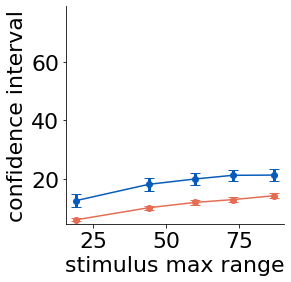

In [987]:
plt.figure(3)

plt.errorbar(numdata.groupby(['Sub_ID','stim_range_bins']).stimrange.mean().groupby(['stim_range_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_range_bins']).Resp_conf.mean().groupby(['stim_range_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_range_bins']).Resp_conf.mean().groupby(['stim_range_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_range_bins']).stimrange.mean().groupby(['stim_range_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_range_bins']).Resp_conf.mean().groupby(['stim_range_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_range_bins']).Resp_conf.mean().groupby(['stim_range_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus max range')
plt.ylabel('confidence interval')
plt.axis('square')
#plt.legend(frameon=False,fontsize=18)

plt.show()

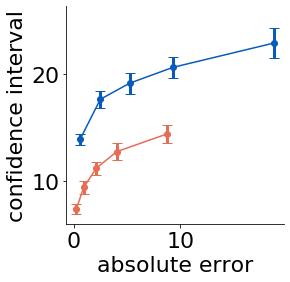

Text(0, 0.5, 'confidence interval')

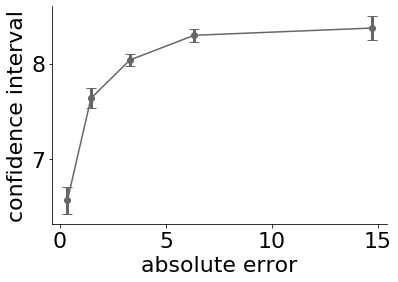

In [1019]:
plt.figure(4)

plt.errorbar(numdata.groupby(['Sub_ID','error_bins']).resperror.mean().groupby(['error_bins']).mean(),
             numdata.groupby(['Sub_ID','error_bins']).Resp_conf.mean().groupby(['error_bins']).mean(),
             numdata.groupby(['Sub_ID','error_bins']).Resp_conf.std().groupby(['error_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','error_bins']).resperror.mean().groupby(['error_bins']).mean(),
             spacedata.groupby(['Sub_ID','error_bins']).Resp_conf.mean().groupby(['error_bins']).mean(),
             spacedata.groupby(['Sub_ID','error_bins']).Resp_conf.mean().groupby(['error_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('absolute error')
plt.ylabel('confidence interval')
plt.axis('square')
#plt.legend(frameon=False,fontsize=18)

plt.show()

plt.figure(4)

plt.errorbar(alldata.groupby(['Sub_ID','error_bins']).resperror.mean().groupby(['error_bins']).mean(),
             alldata.groupby(['Sub_ID','error_bins']).conf_pred.mean().groupby(['error_bins']).mean(),
             alldata.groupby(['Sub_ID','error_bins']).conf_pred.mean().groupby(['error_bins']).sem(),
             fmt='o-',color='#666666',ecolor='#666666', elinewidth=3, capsize=5, label='Space')
sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('absolute error')
plt.ylabel('confidence interval')
#plt.legend(frameon=False,fontsize=18)


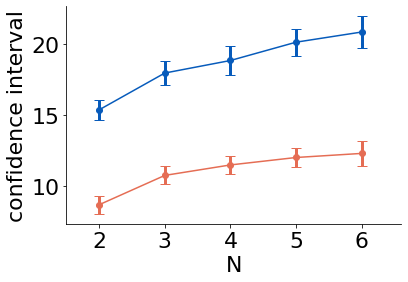

error_bins
1    0.518621
2    0.806932
3    0.998492
4    0.984042
5    1.440642
Name: Resp_conf, dtype: float64

In [762]:
plt.figure(4)

plt.errorbar(numdata.groupby(['Sub_ID','N']).N.mean().groupby(['N']).mean(),
             numdata.groupby(['Sub_ID','N']).Resp_conf.mean().groupby(['N']).mean(),
             numdata.groupby(['Sub_ID','N']).Resp_conf.std().groupby(['N']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','N']).N.mean().groupby(['N']).mean(),
             spacedata.groupby(['Sub_ID','N']).Resp_conf.mean().groupby(['N']).mean(),
             spacedata.groupby(['Sub_ID','N']).Resp_conf.mean().groupby(['N']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('N')
plt.ylabel('confidence interval')
plt.xlim([1.5,6.6])
plt.xticks(np.arange(2,7,1))
#plt.axis('square')
#plt.legend(frameon=False,fontsize=18)

plt.show()

numdata.groupby(['Sub_ID','error_bins']).Resp_conf.std().groupby(['error_bins']).sem()

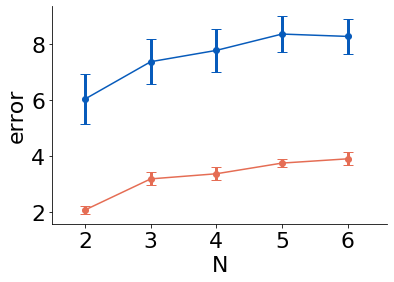

error_bins
1    0.518621
2    0.806932
3    0.998492
4    0.984042
5    1.440642
Name: Resp_conf, dtype: float64

In [763]:
plt.figure(4)

plt.errorbar(numdata.groupby(['Sub_ID','N']).N.mean().groupby(['N']).mean(),
             numdata.groupby(['Sub_ID','N']).resperror.mean().groupby(['N']).mean(),
             numdata.groupby(['Sub_ID','N']).resperror.std().groupby(['N']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','N']).N.mean().groupby(['N']).mean(),
             spacedata.groupby(['Sub_ID','N']).resperror.mean().groupby(['N']).mean(),
             spacedata.groupby(['Sub_ID','N']).resperror.mean().groupby(['N']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('N')
plt.ylabel('error')
plt.xlim([1.5,6.6])
plt.xticks(np.arange(2,7,1))
#plt.axis('square')
#plt.legend(frameon=False,fontsize=18)

plt.show()

numdata.groupby(['Sub_ID','error_bins']).Resp_conf.std().groupby(['error_bins']).sem()

In [855]:
def pathlength(x,y):
    n = len(x) 
    lv = [np.sqrt((x[i]-x[i-1])**2 + (y[i]-y[i-1])**2) for i in range (1,n)]
    L = sum(lv)
    return L


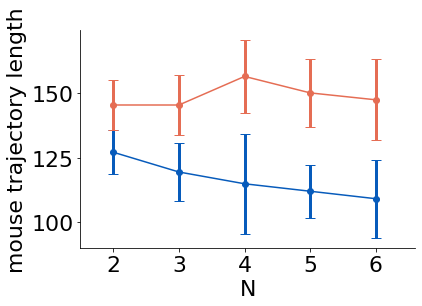

In [907]:
plt.figure(4)

plt.errorbar(numdata.groupby(['Sub_ID','N']).N.mean().groupby(['N']).mean(),
             numdata.groupby(['Sub_ID','N']).mouse_length.mean().groupby(['N']).mean(),
             numdata.groupby(['Sub_ID','N']).mouse_length.std().groupby(['N']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','N']).N.mean().groupby(['N']).mean(),
             spacedata.groupby(['Sub_ID','N']).mouse_length.mean().groupby(['N']).mean(),
             spacedata.groupby(['Sub_ID','N']).mouse_length.mean().groupby(['N']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('N')
plt.ylabel('mouse trajectory length')
plt.xlim([1.5,6.6])
plt.xticks(np.arange(2,7,1))
#plt.axis('square')
#plt.legend(frameon=False,fontsize=18)

plt.show()


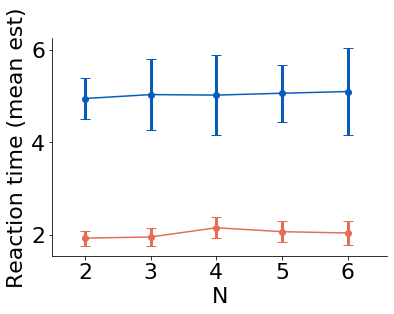

In [909]:
plt.figure(4)

plt.errorbar(numdata.groupby(['Sub_ID','N']).N.mean().groupby(['N']).mean(),
             numdata.groupby(['Sub_ID','N']).RT_resp.mean().groupby(['N']).mean(),
             numdata.groupby(['Sub_ID','N']).RT_resp.std().groupby(['N']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','N']).N.mean().groupby(['N']).mean(),
             spacedata.groupby(['Sub_ID','N']).RT_resp.mean().groupby(['N']).mean(),
             spacedata.groupby(['Sub_ID','N']).RT_resp.mean().groupby(['N']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('N')
plt.ylabel('Reaction time (mean est)')
plt.xlim([1.5,6.6])
plt.xticks(np.arange(2,7,1))
#plt.axis('square')
#plt.legend(frameon=False,fontsize=18)

plt.show()



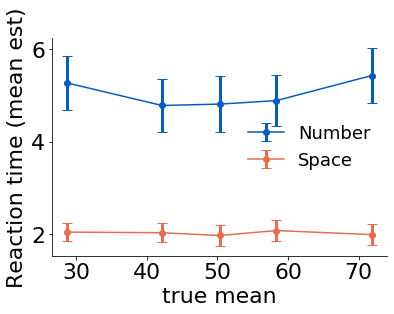

In [883]:
plt.figure(1)

plt.errorbar(numdata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).RT_resp.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).RT_resp.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).RT_resp.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).RT_resp.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('true mean')
plt.ylabel('Reaction time (mean est)')
#plt.axis('square')
plt.legend(frameon=False,fontsize=18)
ax.set_aspect(1,'datalim')
#ax.set_aspect(aspect=0.5)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))


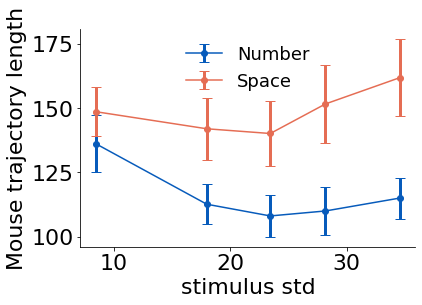

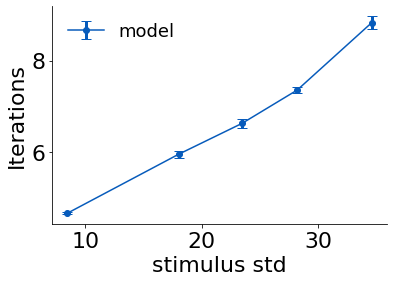

In [1023]:
plt.figure(1)

plt.errorbar(numdata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_std_bins']).mouse_length.mean().groupby(['stim_std_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_std_bins']).mouse_length.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_std_bins']).mouse_length.mean().groupby(['stim_std_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_std_bins']).mouse_length.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus std')
plt.ylabel('Mouse trajectory length')
#plt.axis('square')
plt.legend(frameon=False,fontsize=18)
ax.set_aspect(1,'datalim')
#ax.set_aspect(aspect=0.5)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))


plt.figure(1)

plt.errorbar(alldata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             alldata.groupby(['Sub_ID','stim_std_bins']).iter_pred.mean().groupby(['stim_std_bins']).mean(),
             alldata.groupby(['Sub_ID','stim_std_bins']).iter_pred.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='model')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus std')
plt.ylabel('Iterations')
#plt.axis('square')
plt.legend(frameon=False,fontsize=18)
ax.set_aspect(1,'datalim')
#ax.set_aspect(aspect=0.5)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))


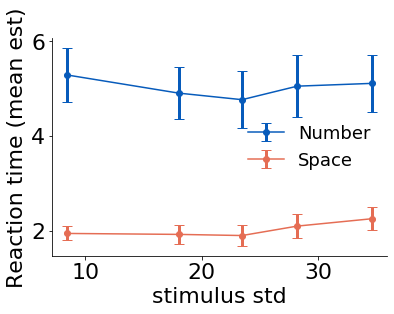

In [889]:
plt.figure(1)

plt.errorbar(numdata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_std_bins']).RT_resp.mean().groupby(['stim_std_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_std_bins']).RT_resp.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_std_bins']).RT_resp.mean().groupby(['stim_std_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_std_bins']).RT_resp.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus std')
plt.ylabel('Reaction time (mean est)')
#plt.axis('square')
plt.legend(frameon=False,fontsize=18)
ax.set_aspect(1,'datalim')
#ax.set_aspect(aspect=0.5)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))


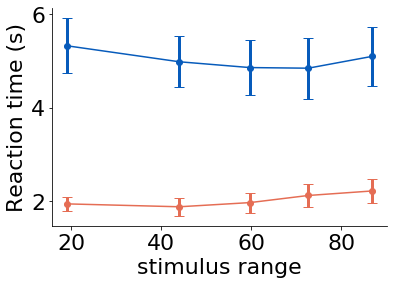

In [908]:
plt.figure(1)

plt.errorbar(numdata.groupby(['Sub_ID','stim_range_bins']).stimrange.mean().groupby(['stim_range_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_range_bins']).RT_resp.mean().groupby(['stim_range_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_range_bins']).RT_resp.mean().groupby(['stim_range_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_range_bins']).stimrange.mean().groupby(['stim_range_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_range_bins']).RT_resp.mean().groupby(['stim_range_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_range_bins']).RT_resp.mean().groupby(['stim_range_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus range')
plt.ylabel('Reaction time (s)')
#plt.axis('square')
#plt.legend(frameon=False,fontsize=18)
ax.set_aspect(1,'datalim')
#ax.set_aspect(aspect=0.5)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))


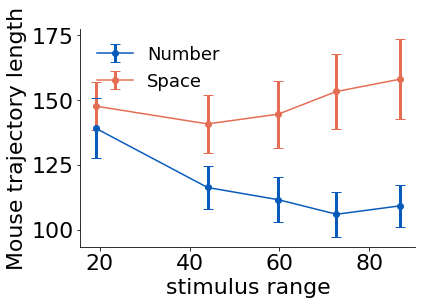

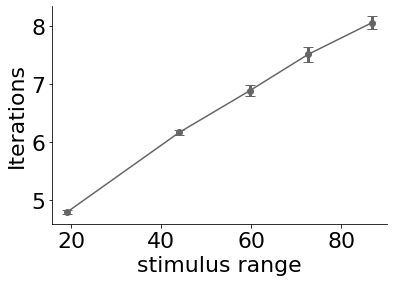

In [1025]:
plt.figure(1)

plt.errorbar(numdata.groupby(['Sub_ID','stim_range_bins']).stimrange.mean().groupby(['stim_range_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_range_bins']).mouse_length.mean().groupby(['stim_range_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_range_bins']).mouse_length.mean().groupby(['stim_range_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_range_bins']).stimrange.mean().groupby(['stim_range_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_range_bins']).mouse_length.mean().groupby(['stim_range_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_range_bins']).mouse_length.mean().groupby(['stim_range_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus range')
plt.ylabel('Mouse trajectory length')
#plt.axis('square')
plt.legend(frameon=False,fontsize=18)
ax.set_aspect(1,'datalim')
#ax.set_aspect(aspect=0.5)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))

plt.figure(1)

plt.errorbar(alldata.groupby(['Sub_ID','stim_range_bins']).stimrange.mean().groupby(['stim_range_bins']).mean(),
             alldata.groupby(['Sub_ID','stim_range_bins']).iter_pred.mean().groupby(['stim_range_bins']).mean(),
             alldata.groupby(['Sub_ID','stim_range_bins']).iter_pred.mean().groupby(['stim_range_bins']).sem(),
             fmt='o-',color='#666666',ecolor='#666666', elinewidth=3, capsize=5, label='Model')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus range')
plt.ylabel('Iterations')
#plt.axis('square')
#plt.legend(frameon=False,fontsize=18)
ax.set_aspect(1,'datalim')
#ax.set_aspect(aspect=0.5)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))



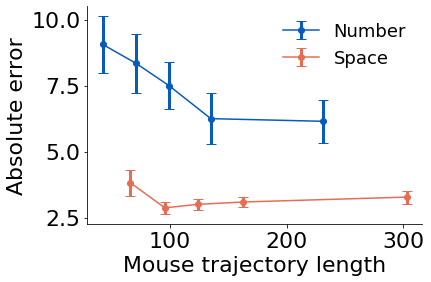

In [906]:
plt.figure(1)

plt.errorbar(numdata.groupby(['Sub_ID','mouse_length_bins']).mouse_length.mean().groupby(['mouse_length_bins']).mean(),
             numdata.groupby(['Sub_ID','mouse_length_bins']).resperror.mean().groupby(['mouse_length_bins']).mean(),
             numdata.groupby(['Sub_ID','mouse_length_bins']).resperror.mean().groupby(['mouse_length_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','mouse_length_bins']).mouse_length.mean().groupby(['mouse_length_bins']).mean(),
             spacedata.groupby(['Sub_ID','mouse_length_bins']).resperror.mean().groupby(['mouse_length_bins']).mean(),
             spacedata.groupby(['Sub_ID','mouse_length_bins']).resperror.mean().groupby(['mouse_length_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('Mouse trajectory length')
plt.ylabel('Absolute error')
#plt.axis('square')
plt.legend(frameon=False,fontsize=18)
ax.set_aspect(1,'datalim')
#ax.set_aspect(aspect=0.5)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))


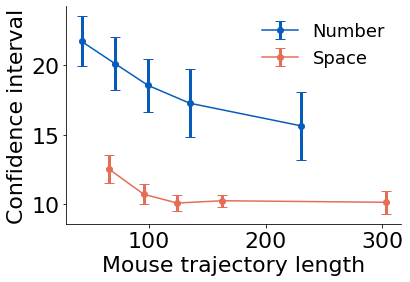

In [1028]:
plt.figure(1)

plt.errorbar(numdata.groupby(['Sub_ID','mouse_length_bins']).mouse_length.mean().groupby(['mouse_length_bins']).mean(),
             numdata.groupby(['Sub_ID','mouse_length_bins']).Resp_conf.mean().groupby(['mouse_length_bins']).mean(),
             numdata.groupby(['Sub_ID','mouse_length_bins']).Resp_conf.mean().groupby(['mouse_length_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','mouse_length_bins']).mouse_length.mean().groupby(['mouse_length_bins']).mean(),
             spacedata.groupby(['Sub_ID','mouse_length_bins']).Resp_conf.mean().groupby(['mouse_length_bins']).mean(),
             spacedata.groupby(['Sub_ID','mouse_length_bins']).Resp_conf.mean().groupby(['mouse_length_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('Mouse trajectory length')
plt.ylabel('Confidence interval')
#plt.axis('square')
plt.legend(frameon=False,fontsize=18)
ax.set_aspect(1,'datalim')
#ax.set_aspect(aspect=0.5)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))





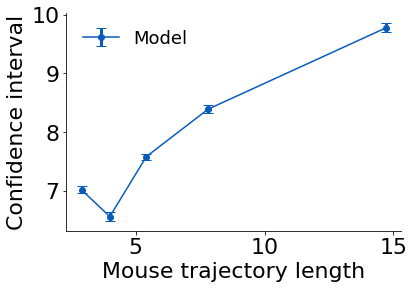

In [1043]:
plt.figure(1)

plt.errorbar(alldata.groupby(['Sub_ID','iter_pred_bins']).iter_pred.mean().groupby(['iter_pred_bins']).mean(),
             alldata.groupby(['Sub_ID','iter_pred_bins']).conf_pred.mean().groupby(['iter_pred_bins']).mean(),
             alldata.groupby(['Sub_ID','iter_pred_bins']).conf_pred.mean().groupby(['iter_pred_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Model')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('Mouse trajectory length')
plt.ylabel('Confidence interval')
#plt.axis('square')
plt.legend(frameon=False,fontsize=18)
ax.set_aspect(1,'datalim')
#ax.set_aspect(aspect=0.5)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))
